In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import cross_val_score
import seaborn as sb
from sklearn.model_selection import (cross_val_score, train_test_split, 
                                     KFold, GridSearchCV)

# Read the dataset

In [3]:
DF = pd.read_csv("DataBooking.csv")

In [4]:
DF

,Unnamed: 0,hotel,Price,rating,reviews,loc(km from center)
0,1,Al Waha Palace Hotel,307,7.8,2098,1.8
1,3,Voyage Hotel,466,8.6,4111,3.8
2,5,Carawan Al Fahad Hotel,350,8.1,2299,2.0
3,7,Gloria Inn Riyadh,326,7.9,4054,8.1
4,9,Rest Night Hotel Suites- - AL Nafal,250,7.4,2158,9.8
...,...,...,...,...,...,...
302,825,شالية فهد,1100,7.4,109,15.8
303,851,Sweet Homes,300,8.2,327,14.5
304,857,Mabaat Homes - Al Malqa - Luxury Apartment,1000,6.4,191,14.9
305,861,شاليه,1500,7.9,229,26.1


# Remove Unnamed: 0 column

In [5]:
DF.drop(columns=['Unnamed: 0'],inplace=True)
DF

,hotel,Price,rating,reviews,loc(km from center)
0,Al Waha Palace Hotel,307,7.8,2098,1.8
1,Voyage Hotel,466,8.6,4111,3.8
2,Carawan Al Fahad Hotel,350,8.1,2299,2.0
3,Gloria Inn Riyadh,326,7.9,4054,8.1
4,Rest Night Hotel Suites- - AL Nafal,250,7.4,2158,9.8
...,...,...,...,...,...
302,شالية فهد,1100,7.4,109,15.8
303,Sweet Homes,300,8.2,327,14.5
304,Mabaat Homes - Al Malqa - Luxury Apartment,1000,6.4,191,14.9
305,شاليه,1500,7.9,229,26.1


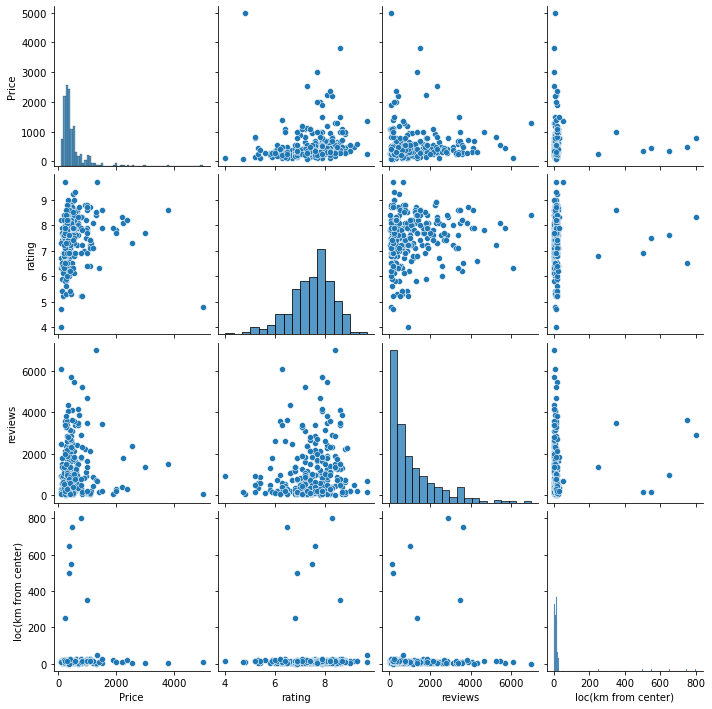

In [6]:
sns.pairplot(DF)

In [7]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   hotel                307 non-null    object 
 1   Price                307 non-null    int64  
 2   rating               307 non-null    float64
 3   reviews              307 non-null    int64  
 4   loc(km from center)  307 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 12.1+ KB


# Feature Selection

In [8]:
DF.corr()

,Price,rating,reviews,loc(km from center)
Price,1.000000,0.124478,0.045447,0.010549
rating,0.124478,1.000000,0.150396,0.003583
reviews,0.045447,0.150396,1.000000,0.079530
loc(km from center),0.010549,0.003583,0.079530,1.000000


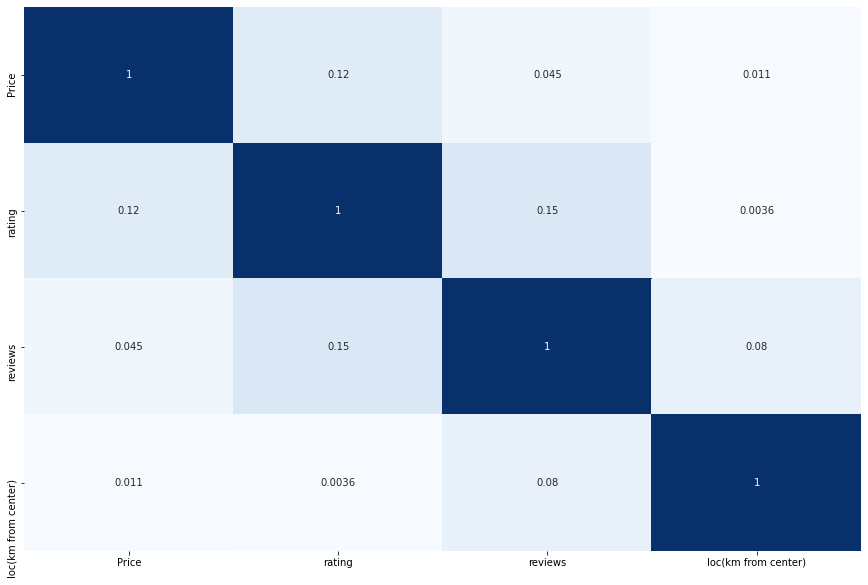

In [45]:
plt.subplots(figsize=(15,10))
dataplot = sb.heatmap(DF.corr(),cbar=False, annot=True , cmap='Blues')

In [13]:
Booking=DF[['Price', 'rating', 'reviews', 'loc(km from center)']]
Booking

,Price,rating,reviews,loc(km from center)
0,307,7.8,2098,1.8
1,466,8.6,4111,3.8
2,350,8.1,2299,2.0
3,326,7.9,4054,8.1
4,250,7.4,2158,9.8
...,...,...,...,...
302,1100,7.4,109,15.8
303,300,8.2,327,14.5
304,1000,6.4,191,14.9
305,1500,7.9,229,26.1


# Splitting the data

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [16]:
X = Booking.drop(['rating'], axis = 1)
y = Booking['rating']

X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression

In [17]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
#print(y_pred)
print(r2_score(y_test, y_pred))

0.015233128002762442


In [18]:
train_score = lr.score(X_train, y_train)
train_score

0.016379510041951262

In [19]:
val_score = lr.score(X_val, y_val)  
val_score

-0.006077065161823159

In [20]:
test_score = lr.score(X_test, y_test)
test_score

0.015233128002762442

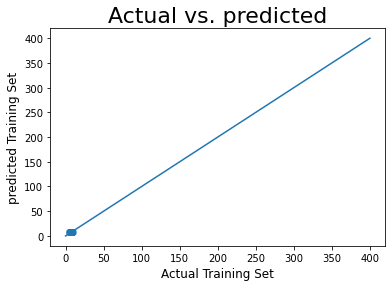

In [30]:
# Actual Training Set(x) vs. predicted Training Set(y)
y_train_pred = lr.predict(X_train)

plt.scatter(y_train, y_train_pred, alpha=0.2)#cross valid do train only 
plt.title("Actual vs. predicted", size=22)
plt.xlabel('Actual Training Set', size=12)
plt.ylabel('predicted Training Set', size=12)
plt.plot([0, 400], [0, 400])
plt.show()

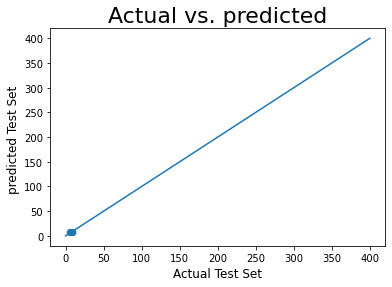

In [31]:
# Actual Test Set(x) vs. predicted Test Set(y)
y_test_pred = lr.predict(X_test)#cross valid do train only 

plt.scatter(y_test, y_test_pred, alpha=0.2)
plt.title("Actual vs. predicted", size=22)
plt.xlabel('Actual Test Set', size=12)
plt.ylabel('predicted Test Set ', size=12)
plt.plot([0, 400], [0, 400])
plt.show()

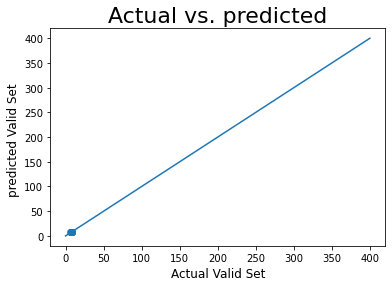

In [32]:
# Actual validation Set(x) vs. predicted validation Set(y)
y_val_pred = lr.predict(X_val)#cross valid do train only 

plt.scatter(y_val, y_val_pred, alpha=0.2)
plt.title("Actual vs. predicted", size=22)
plt.xlabel('Actual Valid Set', size=12)
plt.ylabel('predicted Valid Set ', size=12)
plt.plot([0, 400], [0, 400])
plt.show()

# Polynomial Regression

In [21]:
poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_train)
X_test_poly= poly.transform(X_test)
X_val_poly= poly.transform(X_val)

Plr = LinearRegression()
Plr.fit(X_train_poly, y_train)

LinearRegression()

In [22]:
print(Plr.score(X_train_poly, y_train))

0.15056347864008157


In [23]:
print(Plr.score(X_test_poly, y_test))

-0.7109993800988665


In [24]:
print(Plr.score(X_val_poly, y_val))

-4.034328004169531


# Lasso

Lasso Model:


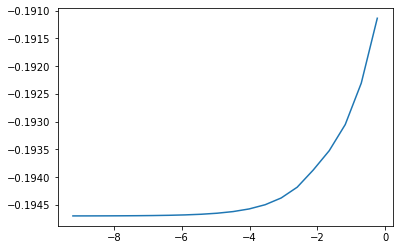

In [36]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)
print("Lasso Model:")
params = {
    "alpha": np.logspace(-4, -.1, 20)
}

grid_est = GridSearchCV(Lasso(), param_grid=params, cv=kfold, 
                        return_train_score=False)
grid_est.fit(X_train, y_train)
DF_L = pd.DataFrame(grid_est.cv_results_)
DF_L["alpha"] = DF_L.params.apply(lambda val: val["alpha"])
plt.plot(np.log(DF_L.alpha), DF_L.mean_test_score);

In [37]:
grid_est.best_estimator_


Lasso(alpha=0.7943282347242815)

In [35]:
params['alpha']

array([1.00000000e-04, 1.60421716e-04, 2.57351270e-04, 4.12847324e-04,
       6.62296762e-04, 1.06246783e-03, 1.70442913e-03, 2.73427446e-03,
       4.38637001e-03, 7.03669004e-03, 1.12883789e-02, 1.81090112e-02,
       2.90507865e-02, 4.66037703e-02, 7.47625680e-02, 1.19935395e-01,
       1.92402418e-01, 3.08655261e-01, 4.95150067e-01, 7.94328235e-01])

Ridge Model:


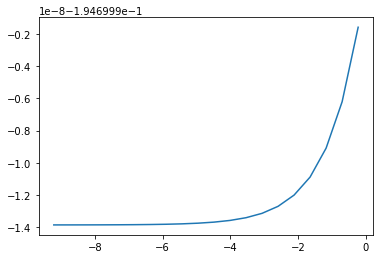

In [38]:
print("Ridge Model:")
params = {
    "alpha": np.logspace(-4, -.1, 20)
}

grid_est_R = GridSearchCV(Ridge(), param_grid=params, cv=kfold, 
                        return_train_score=False)
grid_est_R.fit(X_train, y_train)
df_R = pd.DataFrame(grid_est_R.cv_results_)
df_R["alpha"] = df_R.params.apply(lambda val: val["alpha"])
plt.plot(np.log(df_R.alpha), df_R.mean_test_score);

In [39]:
y_pred = grid_est.predict(X_test)
print("Lasso Regression:", r2_score(y_test, y_pred))

y_pred = grid_est_R.predict(X_test)
print("Ridge Regression:", r2_score(y_test, y_pred))

Lasso Regression: 0.0144761239956126
Ridge Regression: 0.015233124270212284


In [40]:
y_pred = grid_est.predict(X_val)
print("Lasso Regression:", r2_score(y_val, y_pred))

y_pred = grid_est_R.predict(X_val)
print("Ridge Regression:", r2_score(y_val, y_pred))

Lasso Regression: 0.010134381204934484
Ridge Regression: -0.0060770298276793255
